In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

from analysis_tools.transformers.ev_kpi_parser import (tf_ba_transformer)
from analysis_tools.analyzers.imbalance_fixed_plotter import (kpi1_plotter)


pd.set_option('max_columns', None)

### Multiple Games

In [2]:
experiment_path = '/home/danguyen/data/powertac/{}'.format('finals_2021')
#group = 'finals_2021'
#group_path = experiment_path + group
cwd = Path(experiment_path)
games = pd.read_csv(cwd/"games.csv", skipinitialspace=True, delimiter=",")
list_games = games.iloc[:, 0].tolist()
list_games

['finals_2021_1', 'finals_2021_2', 'finals_2021_3']

0.006831854850326263
0.006831854850326263
0.006831854850326263


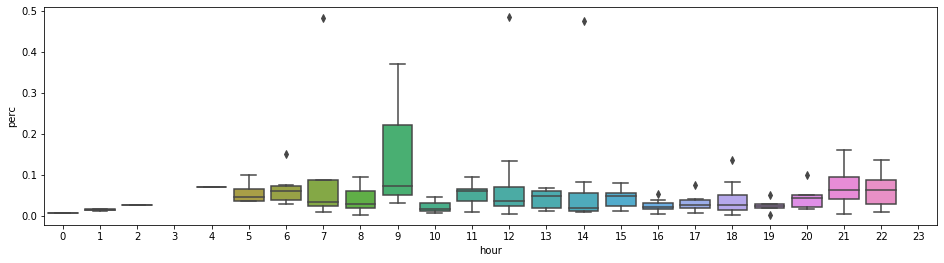

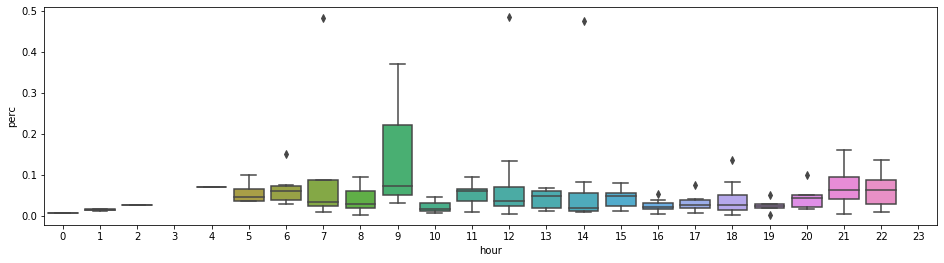

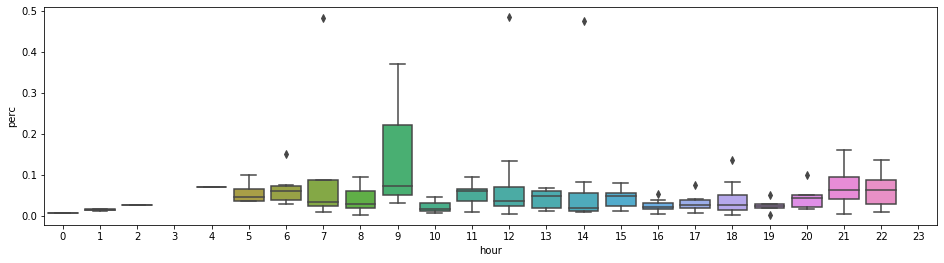

In [3]:
for game in list_games:
    try:
        tf_transactions = pd.read_csv(cwd/"{0}/analysis/{1}.tariff-transactions.csv".format(game, game), skipinitialspace=True, delimiter=";")
        balancing_actions = pd.read_csv(cwd/"{0}/analysis/{1}.broker-balancing-actions.csv".format(game, game), skipinitialspace=True, delimiter=";")
        final_df = tf_ba_transformer(tf_transactions, balancing_actions)
        destination = Path('/home/danguyen/data/powertac/analysis/output')
        kpi1_plotter(final_df, 'BATTERY_STORAGE','up', destination/"{}.imbalance_fixed.png".format(game))
    except IndexError:
        continue

### Extract data

In [8]:
game = 'finals_2021_1'
path = '/home/danguyen/data/powertac/finals_2021/{}/analysis'.format(game)
cwd = Path(path)
tf_transactions = pd.read_csv(cwd/"{}.tariff-transactions.csv".format(game), skipinitialspace=True, delimiter=";")
balancing_actions = pd.read_csv(cwd/"{}.broker-balancing-actions.csv".format(game), skipinitialspace=True, delimiter=";")


### Transform data

In [9]:
final_df = tf_ba_transformer(tf_transactions, balancing_actions)
final_df

,ts,totalImbalance,broker,netLoad,regOffered,regUsed,baseCost,p1,p2,timeslot,broker-name,tariff-type,transaction-type,transaction-kWh,transaction-charge
0,368,7800.1454,CrocodileAgent2020,-1176.6784,-21.3416,-21.3416,34.9099,-26.5582,-0.5184,368,CrocodileAgent2020,STORAGE,CONSUME,-21.341584,3.201238
1,369,10473.1373,CrocodileAgent2020,-1175.2770,-23.0584,-23.0584,34.0314,-28.7303,-0.4821,369,CrocodileAgent2020,STORAGE,CONSUME,-23.058416,3.458762
2,370,7910.8427,CrocodileAgent2020,108.6552,-22.0000,-22.0000,-3.0989,2.8415,-0.4735,370,CrocodileAgent2020,STORAGE,CONSUME,-22.000000,3.300000
3,371,2319.2942,CrocodileAgent2020,122.0125,-23.8320,-23.8320,-4.0068,4.0023,-0.7280,371,CrocodileAgent2020,STORAGE,CONSUME,-23.832043,3.574806
4,377,706.6961,CrocodileAgent2020,704.0833,-17.0560,-17.0560,-24.6080,24.0260,-0.5846,377,CrocodileAgent2020,STORAGE,CONSUME,-17.055964,2.558395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,1709,16266.0400,TUC_TAC,-1432.6330,-5862.3624,-2220.3910,27.6451,-3.7735,-11.6705,1709,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-2220.391002,47.781900
2360,1713,17094.9008,TUC_TAC,2731.7338,-4447.5904,-3371.7469,-49.5573,9.7769,-14.9408,1713,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-3371.746938,72.558606
2361,1714,15544.2776,TUC_TAC,1183.9542,-4710.9329,-1799.9449,-23.3455,0.8189,-10.7578,1714,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-1799.944926,38.734074
2362,1715,-6262.0299,TUC_TAC,-16336.6395,4938.8566,4938.8566,-2743.9118,-2743.9118,824.2150,1715,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,PRODUCE,4938.856644,-360.825790


### Analyze data

0.006831854850326263


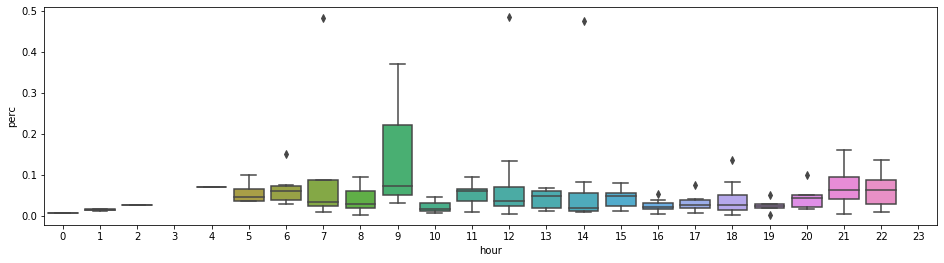

In [15]:
destination = Path('/home/danguyen/data/powertac/analysis')
kpi1_plotter(final_df, 'BATTERY_STORAGE','up', destination/"{}.imbalance_fixed.png".format(game))

## KPI2: Line Plot - Share of each Power Type in controlling capacity

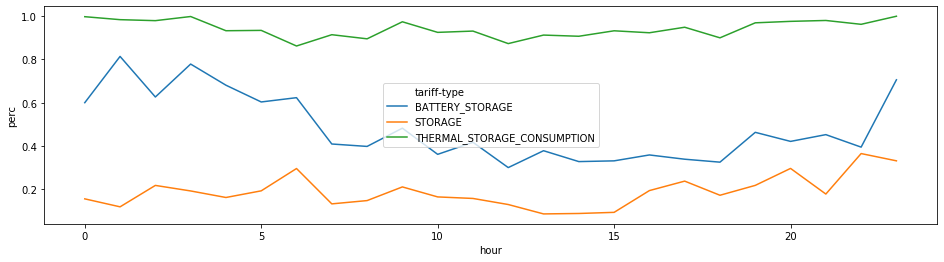

In [34]:


# additionally do it per imbalance side

#def kpi2_share():
    
kpi2_total = final_df[['ts', 'regUsed']].copy()
kpi2_total['regUsed'] = abs(kpi2_total['regUsed'])
kpi2_total = kpi2_total.groupby(by = ['ts'], as_index = False).sum().copy()

kpi2_reg = final_df[['ts', 'regUsed', 'tariff-type']].copy()

kpi2_reg['regUsed'] = abs(kpi2_reg['regUsed'])
kpi2_reg = kpi2_reg.groupby(by = ['ts', 'tariff-type'], as_index = False).sum().copy()

kpi2_perc = kpi2_total.merge(kpi2_reg, on = ['ts'], how = 'left')
kpi2_perc['hour'] = kpi2_perc['ts'] % 24

kpi2_perc['perc'] = kpi2_perc['regUsed_y'] / kpi2_perc['regUsed_x']

kpi2_perc2 = kpi2_perc[['hour', 'perc', 'tariff-type']].copy()
kpi2_perc2 = kpi2_perc2.groupby(by = ['hour', 'tariff-type'], as_index = False).mean()

# up-regulation means shortage and therefore produce/ curtail energy resulting in more energy available
# down-regulation means excess and therefore consume/ storage energy resulting in more energy used
# consume is down-regulation or storage, produce is up-regulation or curtailment
# dots outside are determined outliers

f = plt.figure(figsize=(16,4))

sns.lineplot(x="hour", y="perc", hue="tariff-type", data=kpi2_perc2)




In [ ]:
 kpi1_perc['hour'] = kpi1_perc['ts'] % 24
    kpi1_perc['perc'] = kpi1_perc['regUsed'] / kpi1_perc['totalImbalance']

    f = plt.figure(figsize=(16,4))

    sns.boxplot(x='hour', y='perc', data=kpi1_perc)
    print(kpi1_perc['regUsed'].sum()/kpi1_perc['totalImbalance'].sum())
    
kpi1_imb('BATTERY_STORAGE','up')

In [35]:
kpi2_perc2

,hour,tariff-type,perc
0,0,BATTERY_STORAGE,0.599973
1,0,STORAGE,0.154899
2,0,THERMAL_STORAGE_CONSUMPTION,0.997930
3,1,BATTERY_STORAGE,0.814037
4,1,STORAGE,0.117970
...,...,...,...
67,22,STORAGE,0.364468
68,22,THERMAL_STORAGE_CONSUMPTION,0.962649
69,23,BATTERY_STORAGE,0.705876
70,23,STORAGE,0.330890


In [ ]:
kpi1_df_og = final_df[['ts', 'broker', 'regUsed', 'tariff-type', 'transaction-type', 'transaction-kWh']].copy()
kpi1_df_og['absImbalance'] = abs(kpi1_df_og['totalImbalance'])
kpi1_df_og['absRegulation'] = abs(kpi1_df_og['regUsed'])


kpi1_df = kpi1_df_og[['ts', 'absImbalance', ]]
kpi1_df_og['hour'] = kpi1_df_og['ts'] % 24
kpi1_df['hour'] = kpi1_df['ts'] % 24
kpi1_df['absImbalance'] = abs(kpi1_df['totalImbalance'])
kpi1_df['absRegulation'] = abs(kpi1_df['regUsed'])
kpi1_df['fixedImbalance'] = kpi1_df['absRegulation']/kpi1_df['absImbalance']
kpi1_df

In [76]:
kpi1_df['tariff-type'].unique()

array(['STORAGE', 'BATTERY_STORAGE', 'THERMAL_STORAGE_CONSUMPTION'],
      dtype=object)

In [79]:
kpi1_df[kpi1_df['tariff-type'] == 'THERMAL_STORAGE_CONSUMPTION']['transaction-type'].unique()

array(['PRODUCE', 'CONSUME'], dtype=object)

In [82]:
kpi1_df[kpi1_df['totalImbalance'] > 0]['transaction-type'].unique()

array(['CONSUME'], dtype=object)

In [116]:
final_df

,ts,totalImbalance,broker,netLoad,regOffered,regUsed,baseCost,p1,p2,timeslot,broker-name,tariff-type,transaction-type,transaction-kWh,transaction-charge
0,368,7800.1454,CrocodileAgent2020,-1176.6784,-21.3416,-21.3416,34.9099,-26.5582,-0.5184,368,CrocodileAgent2020,STORAGE,CONSUME,-21.341584,3.201238
1,369,10473.1373,CrocodileAgent2020,-1175.2770,-23.0584,-23.0584,34.0314,-28.7303,-0.4821,369,CrocodileAgent2020,STORAGE,CONSUME,-23.058416,3.458762
2,370,7910.8427,CrocodileAgent2020,108.6552,-22.0000,-22.0000,-3.0989,2.8415,-0.4735,370,CrocodileAgent2020,STORAGE,CONSUME,-22.000000,3.300000
3,371,2319.2942,CrocodileAgent2020,122.0125,-23.8320,-23.8320,-4.0068,4.0023,-0.7280,371,CrocodileAgent2020,STORAGE,CONSUME,-23.832043,3.574806
4,377,706.6961,CrocodileAgent2020,704.0833,-17.0560,-17.0560,-24.6080,24.0260,-0.5846,377,CrocodileAgent2020,STORAGE,CONSUME,-17.055964,2.558395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,1709,16266.0400,TUC_TAC,-1432.6330,-5862.3624,-2220.3910,27.6451,-3.7735,-11.6705,1709,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-2220.391002,47.781900
2360,1713,17094.9008,TUC_TAC,2731.7338,-4447.5904,-3371.7469,-49.5573,9.7769,-14.9408,1713,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-3371.746938,72.558606
2361,1714,15544.2776,TUC_TAC,1183.9542,-4710.9329,-1799.9449,-23.3455,0.8189,-10.7578,1714,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,CONSUME,-1799.944926,38.734074
2362,1715,-6262.0299,TUC_TAC,-16336.6395,4938.8566,4938.8566,-2743.9118,-2743.9118,824.2150,1715,TUC_TAC,THERMAL_STORAGE_CONSUMPTION,PRODUCE,4938.856644,-360.825790
